# SoupX
# Jun Ying
# 30Mar2024

# Ma's data wt-7dpi-1

In [1]:
library(Seurat)
library(SoupX)
library(DropletUtils)
library(ggplot2)
library(DoubletFinder)
library(knitr)
library(SeuratDisk)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

'SeuratObject' was built with package 'Matrix' 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Warning message:
"package 'MatrixGenerics' was built under R version 4.2.1"
Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, col

In [2]:
raw = Read10X_h5('../../rev_MI/Raw/GSE145980/outs/raw_feature_bc_matrix.h5')

In [3]:
ncol(raw)

[1] 322975

# Use processed cells (those have meta)

In [55]:
filtered = Read10X_h5('../../rev_MI/Raw/GSE145980/outs/filtered_feature_bc_matrix.h5')

In [57]:
ncol(filtered)

[1] 3626

In [6]:
meta = read.csv('../10X_Analysis/Dissertation/Files/Ma_GSM4340641_raw_obs.csv',row.names = 1)

In [15]:
rownames(meta)[1]

[1] "wt_7dpi_1_AAACCTGCACGTCAGC-10"

In [16]:
rownames(meta)<-gsub("wt_7dpi_1_","",rownames(meta))

In [17]:
rownames(meta)<-gsub("10","1",rownames(meta))

In [18]:
length(setdiff(rownames(meta),colnames(raw)))

[1] 0

In [19]:
raw = raw[intersect(rownames(filtered),rownames(raw)),]
filtered = raw[intersect(rownames(filtered),rownames(raw)),rownames(meta)]

In [20]:
ncol(filtered)

[1] 1947

In [21]:
raw.matrix = raw
filt.matrix = filtered

In [22]:
if(any(is.na(raw.matrix)) | any(is.na(filt.matrix))) {
  print("NA values found. Please clean your data.")
} else {
  # Proceed with your analysis
  sc <- SoupChannel(raw.matrix, filt.matrix, calcSoupProfile = FALSE)
}

In [23]:
# sc = SoupChannel(raw.matrix, filt.matrix)
sc = estimateSoup(sc)

In [24]:
sc = setClusters(sc, setNames(meta$CT_new2, rownames(meta)))

In [25]:
sc

Channel with 25432 genes and 1947 cells



In [26]:
length(intersect(rownames(meta),colnames(sc$toc)))

[1] 1947

In [30]:
sc = setDR(sc, meta[colnames(sc$toc), c("UMAP1","UMAP2")])

In [31]:
head(meta)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,⋯,Treatment,RFP,db_scores,predicted_db,Citrine,DsRedEx,Title,CT_new2,UMAP1,UMAP2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
AAACCTGCACGTCAGC-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Fibroblasts,12.759421,13.255634
AAACCTGCATCCCACT-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Macrophage 1,9.775912,-7.283558
AAACCTGCATTCTTAC-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Fibroblasts,9.331388,15.047495
AAACCTGGTCCGTCAG-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Fibroblasts,11.813257,13.423609
AAACGGGAGACTTGAA-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Fibroblasts,9.662705,14.426105
AAACGGGCAATCTACG-1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,⋯,NA,NA,NA,NaN,NA,NA,wt_7dpi_1,Macrophage 1,11.882058,-3.520070


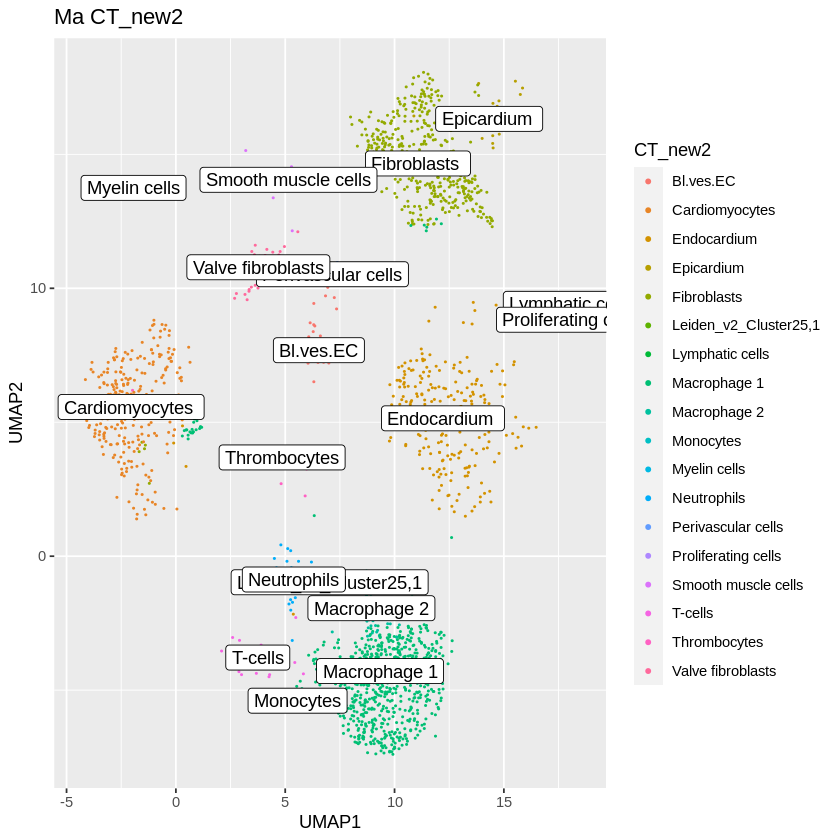

In [35]:
library(ggplot2)
dd = meta[colnames(sc$toc), ]
mids = aggregate(cbind(UMAP1, UMAP2) ~ CT_new2, data = dd, FUN = mean)
gg = ggplot(dd, aes(UMAP1, UMAP2)) + geom_point(aes(colour = CT_new2), size = 0.2) + 
    geom_label(data = mids, aes(label = CT_new2)) + ggtitle("Ma CT_new2") + 
    guides(colour = guide_legend(override.aes = list(size = 1)))
plot(gg)

In [36]:
table(sc$metaData$clusters)


            Bl.ves.EC       Cardiomyocytes           Endocardium  
                   37                   264                   248 
          Epicardium           Fibroblasts  Leiden_v2_Cluster25,1 
                   18                   457                     4 
      Lymphatic cells          Macrophage 1          Macrophage 2 
                    2                   735                    57 
            Monocytes          Myelin cells           Neutrophils 
                    2                     3                    24 
   Perivascular cells   Proliferating cells   Smooth muscle cells 
                   12                     1                     6 
              T-cells          Thrombocytes     Valve fibroblasts 
                   30                     7                    40 

In [37]:
saveRDS(sc,'./write/Ma_wt_7dpi1_SoupX.rds')

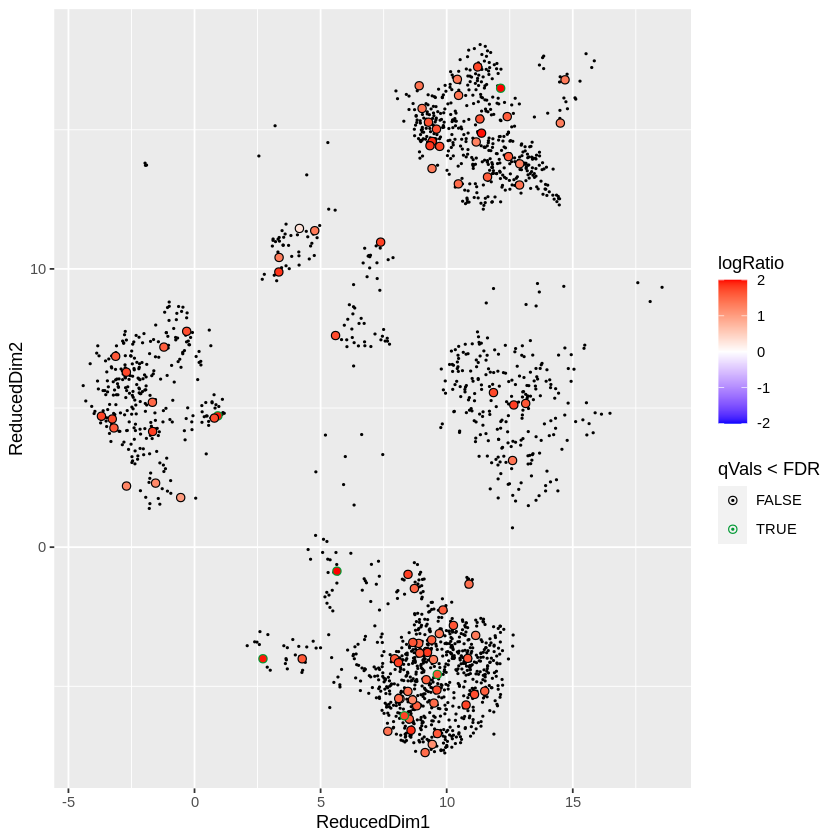

In [62]:
gg = plotMarkerMap(sc, "mpeg1.1")
plot(gg)

In [39]:
nonExpressedGeneList = list(GL = 'kdrl')

In [40]:
# No marker genes found
sc = autoEstCont(sc)

0 genes passed tf-idf cut-off and 0 soup quantile filter.  Taking the top 0.



ERROR: Error in autoEstCont(sc): No plausible marker genes found.  Is the channel low complexity (see help)?  If not, reduce tfidfMin or soupQuantile


# Manually define clusters

In [44]:
Seurat <- CreateSeuratObject(counts = filtered,meta.data = meta)
useToEst2 = estimateNonExpressingCells(sc, nonExpressedGeneList = nonExpressedGeneList, 
    clusters = sc$metaData$CT_new2)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [45]:
table(useToEst2)

useToEst2
FALSE  TRUE 
 1820   127 

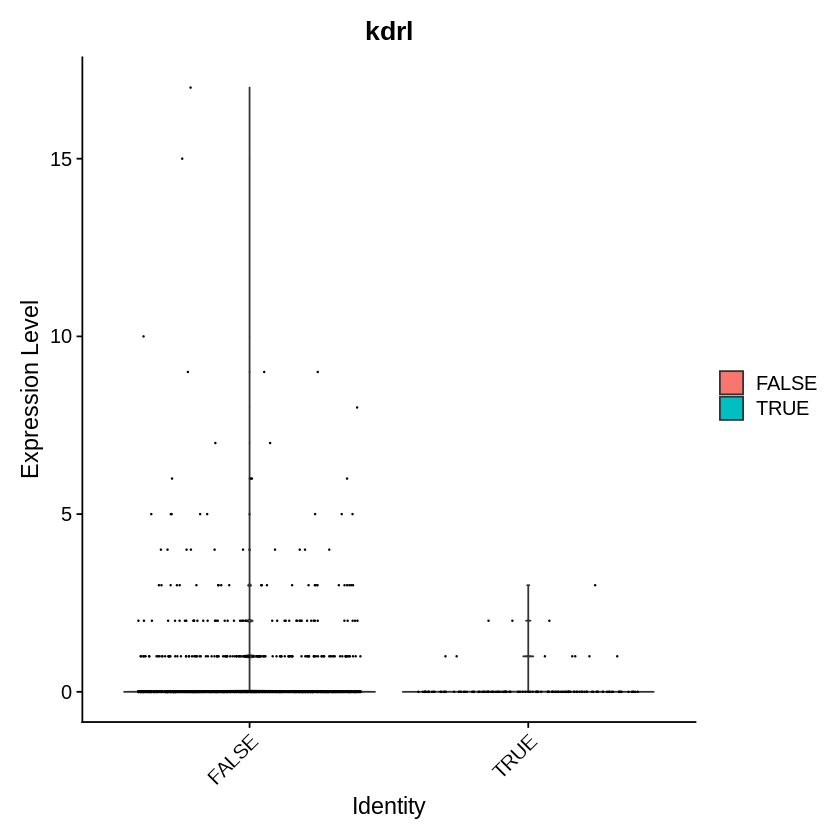

In [46]:
Seurat@meta.data$useToEst2 <- useToEst2

VlnPlot(Seurat,features = 'kdrl',group.by = 'useToEst2')

In [47]:
sc = calculateContaminationFraction(sc, nonExpressedGeneList, useToEst = useToEst2)

ERROR: Error in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept): Contamination fraction greater than 1 detected.  This is impossible and likely represents a failure in the estimation procedure used.


In [51]:
# # Takes forever
# # plotMarkerMap(sc, geneSet = nonExpressedGeneList, useToEst = useToEst2)

# head(sc$soupProfile[order(sc$soupProfile$est, decreasing = TRUE), ], n = 20)

# plotMarkerDistribution(sc)

In [49]:
umap = meta[,c('UMAP1','UMAP2')]

In [50]:
head(umap)

,UMAP1,UMAP2
,<dbl>,<dbl>
AAACCTGCACGTCAGC-1,12.759421,13.255634
AAACCTGCATCCCACT-1,9.775912,-7.283558
AAACCTGCATTCTTAC-1,9.331388,15.047495
AAACCTGGTCCGTCAG-1,11.813257,13.423609
AAACGGGAGACTTGAA-1,9.662705,14.426105
AAACGGGCAATCTACG-1,11.882058,-3.520070


In [51]:
Seurat[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(umap), key = "UMAP", assay = DefaultAssay(Seurat))

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP to UMAP_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_"


Warning message:
"package 'patchwork' was built under R version 4.2.3"


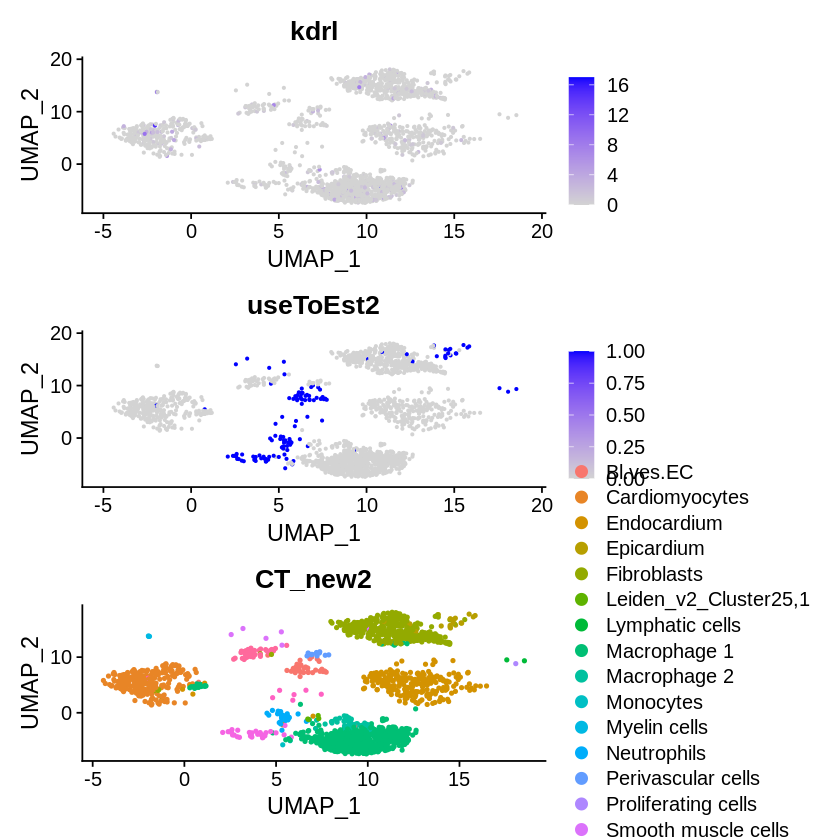

In [52]:
library(ggpubr)
library(patchwork)

gene1='kdrl'
gene2='useToEst2'
group='CT_new2'

plot1 <- FeaturePlot(Seurat, features = c(gene1), pt.size = 0.5)
plot2 <- FeaturePlot(Seurat, features = c(gene2), pt.size = 0.5)
plot3 <- DimPlot(Seurat,group.by = group)

# Arrange plots with ggarrange
# p <- ggarrange(plot1, plot2, plot3,
#           labels = c(gene1, gene2, gene3),
#           ncol = 3, nrow = 1, # Arrange in 1 row and 3 columns
#           common.legend = TRUE, legend = "right", legend.title = "Expression",
#           widths = c(2, 2, 2), heights = c(2), # Set plot sizes
#           title = "FeaturePlot Examples")
# show(p)

plot1+plot2+plot3

In [61]:
out = adjustCounts(sc)

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
"'giveCsparse' is deprecated; setting repr="T" for you"
Expanding counts from 23 clusters to 6414 cells.



In [62]:
cntSoggy = rowSums(sc$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

crabp1a              clpxb             gpr37a             rlbp1b 
                 1                  1                  1                  1 
          tnni2a.4     CABZ01088346.1              fbln1              nptna 
                 1                  1                  1                  1 
ENSDARG00000101611            h2af1al 
                 1                  1

In [63]:
tail(sort(rowSums(sc$toc > out)/rowSums(sc$toc > 0)), n = 20)

CABZ01032488.1             cdkn1d     CABZ01081909.1     CABZ01114105.1 
                 1                  1                  1                  1 
           taco1.1     CABZ01065076.1 ENSDARG00000104871     CABZ01001434.1 
                 1                  1                  1                  1 
    CABZ01080375.1     CABZ01113599.1     CABZ01033180.1     CABZ01035356.1 
                 1                  1                  1                  1 
ENSDARG00000103248     CABZ01102240.1     CABZ01051901.1     CABZ01090890.1 
                 1                  1                  1                  1 
              cdo1     CABZ01078055.1     CABZ01069162.1     CABZ01110379.1 
                 1                  1                  1                  1

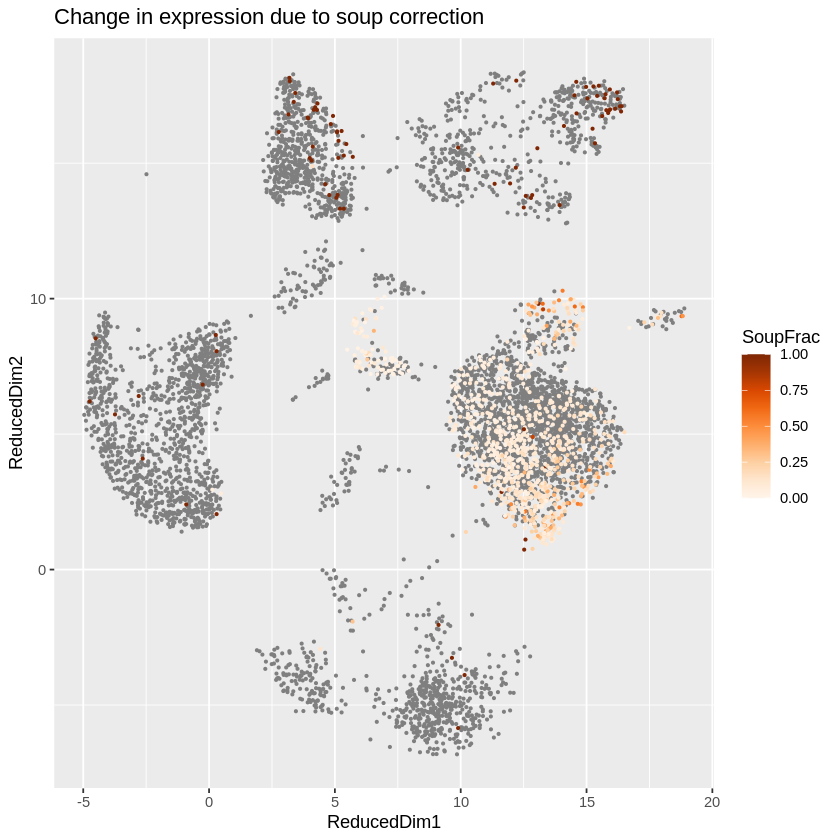

In [64]:
plotChangeMap(sc, out, "kdrl")

In [347]:
srat = CreateSeuratObject(out)

In [348]:
srat

An object of class Seurat 
20450 features across 12838 samples within 1 assay 
Active assay: RNA (20450 features, 0 variable features)
 2 layers present: counts, data